<a href="https://colab.research.google.com/github/mgnarag/binarization-lowres/blob/main/From_Arki_model5_t1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/From Arki/"

 313490484_646790150357239_663796780442369775_n.jpg
 361079911_248325231393045_2145216296096417082_n.jpg
'Applied Physics 184 FX-2'
 Architectural_designs
'BS Applied Physics'
 Classroom
'Colab Notebooks'
'CONSENT_NARAG_MARK JEREMY_G.pdf'
 CONSENT_NARAG_MARKJEREMY_G.pdf
'Dorm bill.png'
'Getting started.pdf'
 IMG_6546.PNG
'IMG_9359 (1).PNG'
 IMG_9359.PNG
'Information Sharing Consent Form - NARAG.pdf'
'Information Sharing Consent Form.pdf'
'[Journal of Cultural Heritage] Discovering artistic influences of painters'
'MS PHYSICS'
'MS Thesis videos'
'NARAG, MARK JEREMY, GACIAS.gdoc'
'NARAG, MARK JEREMY, GACIAS.pdf'
'NARAG, MARK JEREMY.jpg'
 NIP_Narag_MarkJeremy_Consent.pdf
 NIP_Narag_MarkJeremy_Informal.jpg
 NIP_Narag_MarkJeremy_Sablay.jpg
'PEHA 2021 Consent Form (fillable).pdf'
'PHOTO_NARAG_MARK JEREMY_G.jpg'
 PHOTO_NARAG_MARKJEREMY_G.jpg
'Physics 265'
'Physics 301 2S AY2122'
'Physics 305 Data Driven Astronomy'
'Research files'
'Screen Shot 2022-08-31 at 10.46.42.png'
'Screen Shot 2022-09-

In [7]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np
from sklearn import preprocessing

epoch = 100
model_number = 5
size = 128

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.320):
        for i in np.arange(0,int(width/size)+1,0.320):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)


    return data

def crop_(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.320):
        for i in np.arange(0,int(width/size)+1,0.320):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            im1 = im1/4
            data.append(im1)


    return data



train_input = np.array(crop_(ImageOps.grayscale(Image.open(file_path + "Trial 1/Rizal_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Trial 1/Rizal_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop_(ImageOps.grayscale(Image.open(file_path + "Trial 1/Rizal_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "Trial 1/Rizal_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)

Done reading the  training input of size =  (12403, 128, 128)
Done reading the  training out of size =  (12403, 128, 128)
Done reading the  test input of size =  (5600, 128, 128)
Done reading the  test output of size =  (5600, 128, 128)


In [ ]:
x = ImageOps.grayscale(Image.open(file_path + "Rizal_output_train.png"))
print(x.getextrema())
print(x.size)

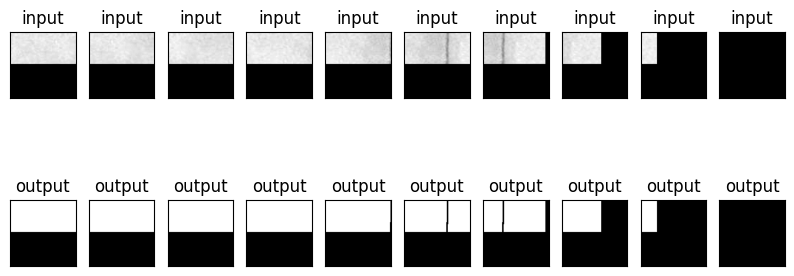

In [ ]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+10000]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+10000]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [ ]:
train_input[4+10000]

In [8]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()


autoencoder.save(file_path + '1 Models/' + 'autoencoder_' + str(model_number))

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+ str(model_number) + '.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+ str(model_number) + '.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")


Epoch 1/100
388/388 [==============================] - 53s 103ms/step - loss: 0.0388 - val_loss: 0.0158
Epoch 2/100
388/388 [==============================] - 38s 99ms/step - loss: 0.0191 - val_loss: 0.0146
Epoch 3/100
388/388 [==============================] - 43s 112ms/step - loss: 0.0173 - val_loss: 0.0132
Epoch 4/100
388/388 [==============================] - 40s 104ms/step - loss: 0.0166 - val_loss: 0.0145
Epoch 5/100
388/388 [==============================] - 41s 105ms/step - loss: 0.0161 - val_loss: 0.0127
Epoch 6/100
388/388 [==============================] - 45s 115ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 7/100
388/388 [==============================] - 41s 105ms/step - loss: 0.0155 - val_loss: 0.0129
Epoch 8/100
388/388 [==============================] - 45s 115ms/step - loss: 0.0152 - val_loss: 0.0128
Epoch 9/100
388/388 [==============================] - 45s 116ms/step - loss: 0.0150 - val_loss: 0.0128
Epoch 10/100
388/388 [==============================] - 45s 115ms